## 程式 6.1:  生成隨機字串

In [1]:
import random
import numpy as np
from matplotlib import pyplot as plt

alphabet = "abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ,.! " #我們用來組成字串的字元清單（包含空格及一些符號）
target = "Hello World!" #目標字串

class Individual: #建立類別來儲存族群中每個個體的資訊
  def __init__(self, string, fitness=0):
    self.string = string
    self.fitness = fitness

def spawn_population(length, size): #生成初始族群中的隨機字串
  pop = []
  for i in range(size):
    string = ''.join(random.choices(alphabet,k=length)) #將選出的字元拼在一起
    individual = Individual(string)
    pop.append(individual)
  return pop

from difflib import SequenceMatcher

def similar(a, b): #計算兩字串的相似度，並回傳適應度分數
  return SequenceMatcher(None, a, b).ratio() #傳回值介於0～1，1代表完全符合，0代表完全不符合

## 程式 6.2： 重組及突變

In [2]:
def recombine(p1_, p2_): #將兩個親代字串重組，並產生兩個後代字串
  p1 = p1_.string
  p2 = p2_.string
  child1 = []
  child2 = []
  cross_pt = random.randint(0,len(p1)) #隨機設定重組的切割位置，會切成兩段以進行重組
  child1.extend(p1[0:cross_pt]) #重組兩個親代字串
  child1.extend(p2[cross_pt:])
  child2.extend(p2[0:cross_pt])
  child2.extend(p1[cross_pt:])
  c1 = Individual(''.join(child1))
  c2 = Individual(''.join(child2))
  return c1, c2

def mutate(x, mut_rate): #透過隨機改變字串中的字母來達到突變的目的
  new_x_ = []
  for char in x.string:
    if random.random() < mut_rate: 
      new_x_.extend(random.choices(alphabet,k=1)) #從之前的字元清單中隨機選出一個字元替換原有字元
    else:
      new_x_.append(char) #保留原有字元
  new_x = Individual(''.join(new_x_))
  return new_x

## 程式 6.3： 評估個體與產生新一代字串族群

In [3]:
def evaluate_population(pop, target): #計算族群中每個個體的適應度分數
  avg_fit = 0 #用來儲存族群內個體的平均適應度
  for i in range(len(pop)):
    fit = similar(pop[i].string, target) #利用程式6.1中的similar( )函式計算適應度
    pop[i].fitness = fit
    avg_fit += fit
  avg_fit /= len(pop) #計算整個族群的平均適應度
  return pop, avg_fit

def next_generation(pop, size, length, mut_rate): #透過重組和突變來產生新一代字串族群
  new_pop = []
  while len(new_pop) < size:
    parents = random.choices(pop,k=2, weights=[x.fitness for x in pop]) #根據適應度隨機選出2個親代個體
    offspring_ = recombine(parents[0],parents[1]) #利用程式6.2中的recombine( )函式進行重組
    child1 = mutate(offspring_[0], mut_rate=mut_rate)#進行突變處理
    child2 = mutate(offspring_[1], mut_rate=mut_rate)
    offspring = [child1, child2]
    new_pop.extend(offspring)
  return new_pop

## 程式 6.4： 完整的進化過程

In [4]:
num_generations = 150 #總世代數
population_size = 900 #族群大小
str_len = len(target) #取得目標字串的長度
mutation_rate = 0.00001 #將突變率設定為0.001%

pop_fit = [] #建立一個儲存族群適應度的串列
pop = spawn_population(size=population_size, length=str_len) #建立初始族群
done = False #用來記錄是否已繁衍出目標字串，若已生成則為True
for gen in range(num_generations):
  pop, avg_fit = evaluate_population(pop, target)
  pop_fit.append(avg_fit) #將訓練過程中，每個世代的族群平均適應度記錄下來
  new_pop = next_generation(pop, size=population_size, length=str_len, mut_rate=mutation_rate) #產生新世代的族群
  pop = new_pop
  for x in pop:
    if x.string == target: 
      print("Target Found!")
      done = True
  if done: #只要繁衍出目標字串，就提前結束進化過程
    break

In [5]:
pop.sort(key=lambda x:x.fitness,reverse=True)
pop[0].string

'Hllo orld!IG'

## 程式 6.4（測試）

Hllo orld!IG


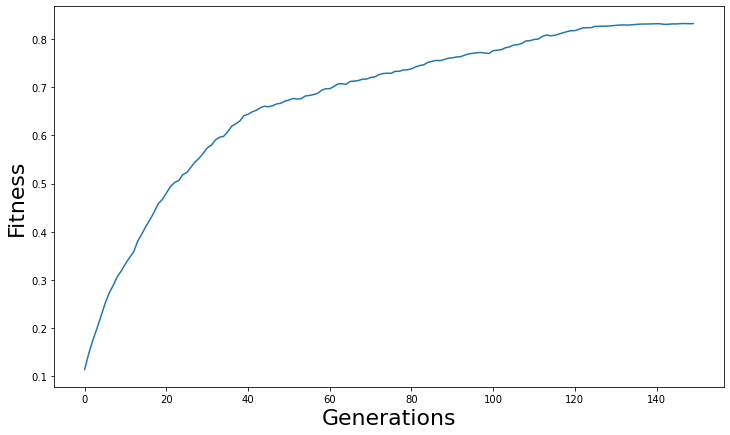

In [6]:
pop.sort(key=lambda x: x.fitness, reverse=True) #直接對pop進行排序，適應度高的在前面
print(pop[0].string)
#小編補充：結果視覺化#
plt.figure(figsize=(12,7))
plt.xlabel("Generations",fontsize=22)
plt.ylabel("Fitness",fontsize=22)
plt.plot(pop_fit)

### 小編補充測試：

    

Target Found! at gen=21
Hello World!


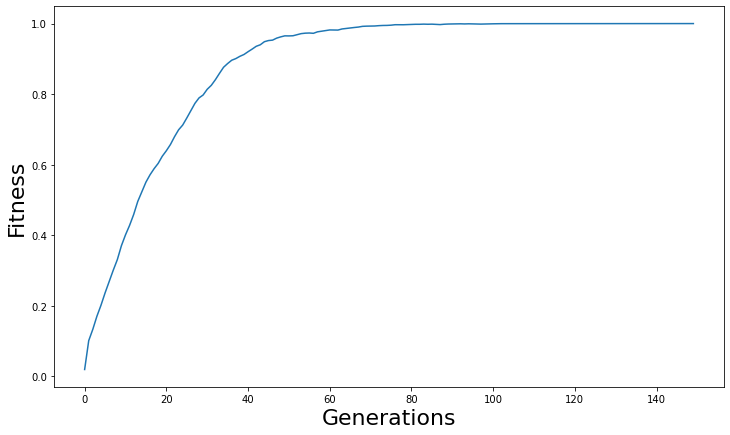

In [7]:
def similar(a, b): #改為比較同位置的字元, 並以相同的比例做為適應度分數
  cnt = 0
  for i in range(len(a)):
    if a[i] == b[i]:
      cnt += 1
  return cnt / len(a)
  
pop_fit = []
pop = spawn_population(size=population_size, length=str_len) #建立初始族群
done = False
for gen in range(num_generations):
  pop, avg_fit = evaluate_population(pop, target)
  pop_fit.append(avg_fit) #將訓練過程中，每個世代的族群平均適應度記錄下來
  new_pop = next_generation(pop,size=population_size, length=str_len, mut_rate=mutation_rate)
  pop = new_pop
  for x in pop:
    if x.string == target: 
      if not done: print(f"Target Found! at gen={gen}")
      done = True

pop.sort(key=lambda x: x.fitness, reverse=True) #直接對pop進行排序，適應度高的在前面
print(pop[0].string)
plt.figure(figsize=(12,7))
plt.xlabel("Generations",fontsize=22)
plt.ylabel("Fitness",fontsize=22)
plt.plot(pop_fit)


## 程式 6.5： 定義代理人

In [8]:
import random 
import numpy as np
import torch

def model(x,unpacked_params):
  l1,b1,l2,b2,l3,b3 = unpacked_params #對參數向量進行拆解，將不同層的參數矩陣獨立出來
  y = torch.nn.functional.linear(x,l1,b1) #加入包含偏值的簡單線性層
  y = torch.relu(y) #以ReLU函數做為激活函數
  y = torch.nn.functional.linear(y,l2,b2)
  y = torch.relu(y)
  y = torch.nn.functional.linear(y,l3,b3)
  y = torch.log_softmax(y,dim=0) #輸出各動作的對數化機率
  return y

## 程式 6.6： 拆解參數向量

In [9]:
def unpack_params(params, layers=[(25,4),(10,25),(2,10)]): #定義每一層網路的矩陣形狀
  unpacked_params = [] #儲存每一層網路的權重及偏值
  e = 0
  for i,layer in enumerate(layers): #逐一走訪網路中的每一層
    s,e = e,e+np.prod(layer) #計算目前層權重資料的索引位置（由s到e），例如第一層，s = 0， e = 25x4 = 100  
    weights = params[s:e].view(layer) #取出目前層的權重參數並轉成矩陣形式，例如第一層會取出params[0:100]並轉成25x4的權重矩陣
    s,e = e,e+layer[0] # 計算目前層偏值資料的索引位置（由s到e），例如第一層，s = 100， e = 100+25 = 125
    bias = params[s:e] #取出目前層的偏值參數並轉成矩陣形式，例如第一層會取出params[100:125]並轉成1x25的偏值向量
    unpacked_params.extend([weights,bias]) #將獨立出來的張量存入串列中
  return unpacked_params

## 程式 6.7： 產生族群

In [10]:
def spawn_population(N,size): #N代表族群中的個體數量，size則是參數向量的參數總數
  pop = []
  for i in range(N):
    vec = torch.randn(size) / 2.0 #隨機產生一個初始參數向量
    fit = 0
    p = {'params':vec, 'fitness':fit} #將參數向量和它的適應度分數存入字典中，代表一個代理人
    pop.append(p) #將代理人加入串列中
  return pop

## 程式 6.8： 基因重組

In [11]:
def recombine(x1,x2): #x1和x2代表『親代』代理人，資料型別為字典
  x1 = x1['params'] #將代理人的參數向量抽取出來
  x2 = x2['params']
  n = x1.shape[0] #取得參數向量的長度
  split_pt = np.random.randint(n) #隨機產生一整數，代表重組時的切割位置
  child1 = torch.zeros(n)
  child2 = torch.zeros(n)
  child1[0:split_pt] = x1[0:split_pt] #第一個後代是由x1的前段和x2的後段組合而成
  child1[split_pt:] = x2[split_pt:]
  child2[0:split_pt] = x2[0:split_pt] #第二個後代是由x2的前段和x1的後段組合而成
  child2[split_pt:] = x1[split_pt:]
  c1 = {'params':child1, 'fitness': 0.0} #{將新產生的兩個參數向量分別存入字典中，產生兩個後代代理人
  c2 = {'params':child2, 'fitness': 0.0}
  return c1, c2

## 程式 6.9： 使參數向量突變

In [12]:
def mutate(x, rate): #rate代表突變率
  x_ = x['params'] #取出參數向量
  num_to_change = int(rate * x_.shape[0]) #使用突變率來決定參數向量中有多少參數發生突變
  idx = np.random.randint(low=0,high=x_.shape[0],size=(num_to_change,)) #產生要替換數值的索引位置串列
  x_[idx] = torch.randn(num_to_change) / 10.0 #將參數向量中指定位置的參數，替換成標準常態分佈的隨機值
  x['params'] = x_
  return x

### 安裝gym環境

In [13]:
!pip install gym[classic_control]

  Created wheel for gym: filename=gym-0.18.0-py3-none-any.whl size=1656456 sha256=89c67390dbd8fa03b8ecaa3808f1d944b6e6fc04cb70e97c35f3bab626e70038
  Stored in directory: c:\users\admin\appdata\local\pip\cache\wheels\d8\e7\68\a3f0f1b5831c9321d7523f6fd4e0d3f83f2705a1cbd5daaa79
Successfully built gym


## 程式 6.10： 在環境中測試代理人

In [14]:
import gym
env = gym.make("CartPole-v0")

def test_model(agent):
  done = False
  state = torch.from_numpy(env.reset()).float()
  score = 0 #追蹤遊戲進行了多少步，並以此做為代理人的得分
  while not done: #只要遊戲還沒有輸便持續執行迴圈
    params = unpack_params(agent['params'])
    probs = model(state, params) #將代理人的參數套入模型中，並產生各動作的機率分佈
    action = torch.distributions.Categorical(probs=probs).sample() #依照各動作的機率分佈，隨機選擇一個動作
    state_, reward, done, info = env.step(action.item())
    state = torch.from_numpy(state_).float()
    score += 1 #追蹤遊戲進行了多少步，並以此做為代理人的得分
  return score

## 程式 6.11： 測試族群中的所有代理人

In [15]:
def evaluate_population(pop):
  tot_fit = 0 #儲存族群的總適應度，可用來計算族群的平均適應度 
  for agent in pop: #測試族群中的每一位代理人
    score = test_model(agent) #在環境中執行代理人，評估其適應度
    agent['fitness'] = score #將代理人的適應度儲存起來
    tot_fit += score
  avg_fit = tot_fit / len(pop) #計算族群的平均適應度
  return pop, avg_fit

## 程式 6.12： 產生下一代

In [16]:
def next_generation(pop,mut_rate,tournament_size):
  new_pop = []
  lp = len(pop)
  while len(new_pop) < len(pop): #若後代族群尚未被填滿，則持續執行迴圈
    rids = np.random.randint(low=0,high=lp,size=(int(tournament_size*lp))) #選擇一定比例的族群個體組成子集（將它們的索引存到 rids）
    batch = np.array([[i,x['fitness']] for (i,x) in enumerate(pop) if i in rids]) #從族群中挑選代理人組成代理人批次，並記錄這些代理人在原始族群中的索引值，以及它們的適應度。
    scores = batch[batch[:, 1].argsort()] #將批次中的代理人依照適應度由低至高排序
    i0, i1 = int(scores[-1][0]),int(scores[-2][0]) #順序位於最下方的代理人具有最高的適應度；此處選擇最末的兩個代理人做為親代
    parent0,parent1 = pop[i0],pop[i1]
    offspring_ = recombine(parent0,parent1) #將親代重組成後代
    child1 = mutate(offspring_[0], rate=mut_rate) #在放入後代族群前，對新代理人進行突變處理
    child2 = mutate(offspring_[1], rate=mut_rate)
    offspring = [child1, child2]
    new_pop.extend(offspring)
  return new_pop

## 程式 6.13： 訓練模型

In [ ]:
num_generations = 20 #進化過程的世代數（經歷20代的繁衍）
population_size = 500 #每一代族群中的個體數
mutation_rate = 0.01 #突變率
pop_fit = []
pop = spawn_population(N=population_size,size=407) #產生初始族群
for i in range(num_generations):
  pop, avg_fit = evaluate_population(pop) #評估族群中每一個代理人的適應度（得分）
  pop_fit.append(avg_fit)
  pop = next_generation(pop, mut_rate=mutation_rate,tournament_size=0.2) #產生後代族群

### 小編補充：結果視覺化

In [ ]:
def running_mean(x, N=50):
  kernel = np.ones(N)
  conv_len = x.shape[0]-N
  y = np.zeros(conv_len)
  for i in range(conv_len):
    y[i] = kernel @ x[i:i+N]
    y[i] /= N
  return y
    
plt.figure(figsize=(12,7))
plt.xlabel("Generations",fontsize=22)
plt.ylabel("Score",fontsize=22)
plt.plot(running_mean(np.array(pop_fit),3))

## 程式 6.14： 設定隨機種子

In [ ]:
import numpy as np
np.random.seed(10) #設定隨機種子為10
np.random.rand(4) #隨機生成4個數字

In [ ]:
np.random.seed(10)
np.random.rand(4)